In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import keras
import cv2

Using TensorFlow backend.


# Trying Augmentation

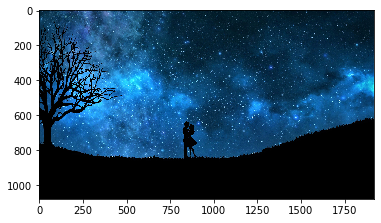

In [52]:
img = cv2.imread("856363.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [53]:
img = img.reshape((1,)+img.shape)
img.shape  #datagen.fit requires shape to have rank=4

(1, 1080, 1920, 3)

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
datagen = ImageDataGenerator(featurewise_center=True,
                             samplewise_center=True,
                             rotation_range=15,
                             width_shift_range=20,
                             height_shift_range=20,
                             zoom_range=0.2,
                             fill_mode='constant',
                             cval = 0,
                             horizontal_flip=True,
                            )

In [49]:
datagen.fit(img)

In [50]:
# Creates 20 augmented pictures
pics = 0
for batch in datagen.flow(img,
                          save_to_dir='C:/Users/Max/Desktop/3rd Year of NCCU/Design Thinking X AI/Test', 
                          save_prefix='cat', 
                          save_format='jpeg'):
    
    pics += 1
    if pics > 19:
        break

# Using Augmentation in the model

In [ ]:
# Create image array
directory = "E:/Top & Bottom/Top"
desired_size = 200

os.chdir(directory)
images = os.listdir(directory)
img_no = 0
for image in images:
    im = cv2.imread(image)

    old_size = old_height, old_width = im.shape[:2]
    ratio = float(desired_size/max(old_size))
    new_height, new_width = int(old_height*ratio), int(old_width*ratio)
    img = cv2.resize(im, (new_width, new_height))
    
    left = (desired_size-new_width)//2
    right = desired_size-(new_width+left)
    top = (desired_size-new_height)//2
    bottom = desired_size-(new_height+top)
    color = [0, 0, 0] # white R,G,B
    
    img2 = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value = color)
    
    img_no += 1
    img_name = "Top" + "_" + str(img_no) +".jpg" #Modify name each pic
    cv2.imwrite(img_name, img2)
    
    print(f"Created: {img_name} from {image}")

In [2]:
# 設定好圖片資料夾位置及上/下身
DIRECTORY = "E:/Top & Bottom/Test"
CATEGORIES = ["Bottom", "Top"]

In [3]:
# 這邊產生X，利用cv2.imread將圖片存成(200, 200, 3)的array，將全部的array合併

i = 0
for image in os.listdir(DIRECTORY):
    
    i+=1
    img_array = cv2.imread(os.path.join(DIRECTORY, image))
    if i==1:
        X = img_array
    
    else:
        X = np.append(X, img_array)
    
    #方便追蹤進度
    if i%100 == 0:
        print(f"{i} images loaded")
    
X = np.array(X).reshape(i, 200, 200, 3)
print("All images loaded")

100 images loaded
200 images loaded
300 images loaded
400 images loaded
500 images loaded
600 images loaded
700 images loaded
All images loaded


In [5]:
# 這邊產生Y
number_of_pics = 390

"""
"Bottom" : 0
"Top" : 1
"""

Y = []
for i in range(2):
    Y.append([i]*number_of_pics)
    
Y = np.array(Y)
Y = Y.reshape(number_of_pics*2, ) #Reshape成接下來可供訓練的格式

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 50)

In [10]:
from keras.utils import to_categorical

In [11]:
# One-hot encoding
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [17]:
# Create Model
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Activation, Flatten
from keras.optimizers import Adam, SGD

In [18]:
model = Sequential()

model.add(Conv2D(8, (3, 3), padding = 'same', input_shape = (200, 200, 3), activation = 'relu'))
model.add(Conv2D(8, (3, 3), padding = 'same', activation = 'relu'))

model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(16, (3, 3), padding = 'same', activation = 'relu'))
model.add(Conv2D(16, (3, 3), padding = 'same', activation = 'relu'))

model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))

model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(32, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

model.compile(loss = "logcosh", optimizer=Adam(lr = 0.001), metrics = ['accuracy'])

In [19]:
# 查看模型架構
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 8)       224       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 200, 200, 8)       584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 8)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 16)      1168      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 100, 100, 16)      2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 32)        4640      
__________

In [12]:
# Data Augmentation Module

In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:
datagen = ImageDataGenerator(featurewise_center=True,
                             samplewise_center=True,
                             rotation_range=15,
                             width_shift_range=20,
                             height_shift_range=20,
                             zoom_range=0.2,
                             fill_mode='constant',
                             cval = 0,
                             horizontal_flip=True,
                            )

In [16]:
datagen.fit(X_train)
# 接下來先建好model，最後用model.fit_generator來同時建立augumentation data及訓練

In [30]:
model.fit_generator(datagen.flow(X_train, Y_train, batch_size = 32),
                    steps_per_epoch = len(X_train)*5/32,
                    epochs = 12)

Epoch 1/12
98/97 [==============================] - 35s 357ms/step - loss: 0.2179 - acc: 0.4978
Epoch 2/12
98/97 [==============================] - 31s 317ms/step - loss: 0.2174 - acc: 0.4987
Epoch 3/12
98/97 [==============================] - 31s 315ms/step - loss: 0.2185 - acc: 0.4962
Epoch 4/12
24/97 [======>.......................] - ETA: 24s - loss: 0.2152 - acc: 0.5039

KeyboardInterrupt: 

In [25]:
Y_predict = model.predict_classes(X_test)